In [ ]:
--- Metodologi ML

*** Domain Knowledge - Business Knowledge

- Define Problem
- Define Goals
- Data Collection
- Deskripsi features dan target

----- Data Exploration & Data Cleaning ----
- Checking Data Types
- Checking Missing Value & Handle it (dont forget to use parameter `inplace = True` or assign to dataFrame) ===> Drop or Fill (Using Synthetic Data)
df = df.dropna()
Termasuk menangani value yg tidak biasa ('?', 'unknown')
- Describe Data (Numerik & Kategorik)
- Cek Data Outliers ==> dan di handle ==> DROP -- Keep ==> Keep -- Re-categorise (Apapun pilihannya harus berdasarkan Analisa Domain Knowledge dan Goals)


----- Data Analysis & Data Visualization ---
- Analysis Univariate Using Crosstab, value_counts, subsetting
- Analysis Multivariate Using Crosstab, groupby atau pivot table
- Insight dari setiap Analisa yg dilakukan

- Lakukan Visualisasi Data Univariate - (proporsi - bar, pie), distribusi (box, hist)
- lakukan visualisasi Data Multivariate
- Insight dari visualisasi yg digunakan


------- Data Preparation -------
------ Feature Engineering & Feature Selection ----
--optional : Encoding
-- cek korelasi
-- optional : cek asosiasi
-- optional : adding feature
-- optional : binning atau recategorise
-- optional : polynomial
-- optional : scalling
-- feature selection
-- optional : imbalance handling
    
    
---- Machine Learning Modelling
- Splitting Data
- Model Training (.fit)
- optional : Tuning
- optinal : coba model-algoritma lain
- Evaluation Matrix
- Optional : Comparison (jika menggunakan lebih dari 1 model)
- Deploy : Export Model
    

---- Conclusion
- Kesimpulan
- Saran/ Rekomendasi


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Health Insurance Cross Selling Prediction

## Problem
> Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer. Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Goal
> Build machine learning to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## About Dataset
- We get the dataset from kaggle : https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Feature Descriptions
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: 1 : Customer is interested, 0 : Customer is not interested

In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
## Check outliers in Annual Premium

In [9]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [10]:
Q1 = df['Annual_Premium'].describe()['25%']
Q3 = df['Annual_Premium'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print('Banyaknya annual premium yang outliers dibawah lower_fence: ', (len(df[df['Annual_Premium'] < lower_fence])))
print('Banyaknya annual premium yang outliers diatas upper_fence: ', (len(df[df['Annual_Premium'] > upper_fence])))

Banyaknya annual premium yang outliers dibawah lower_fence:  0
Banyaknya annual premium yang outliers diatas upper_fence:  10320


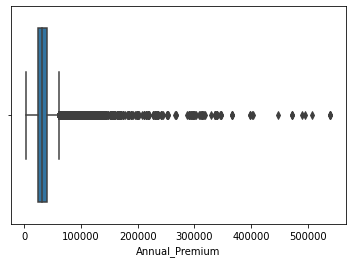

In [11]:
sns.boxplot(df['Annual_Premium'])
plt.show()

In [12]:
datadesc = []
for i in df.columns:
    datadesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,id,int64,0,0.0,381109,"[336060, 248113]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[35, 84]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[1.0, 44.0]"
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[173545.0, 25273.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[110.0, 53.0]"


- We don't have missing value so we can go to next step. Data Analysis

## Data Analysis & Data Visualization

### Univariate

In [13]:
df['Gender'].describe()

count     381109
unique         2
top         Male
freq      206089
Name: Gender, dtype: object

In [14]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

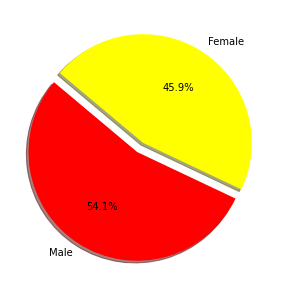

In [15]:
labels = 'Male', 'Female'
sizes = [206089, 175020]
colors = ['red', 'yellow']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- 54% from health insurace owner are male

In [16]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [17]:
df['Age'].value_counts().head(5)

24    25960
23    24256
22    20964
25    20636
21    16457
Name: Age, dtype: int64

In [18]:
df['Age'].value_counts().tail(5)

81    56
82    29
83    22
84    11
85    11
Name: Age, dtype: int64

- Health insurance owner in this data mostly are 24 years old. Top 5 are 24, 23, 22, 25, 21 years old. Bottom 5 are 81, 82, 83, 84, 85 years old
- Youngest health insurance owner are 20 years old and oldest one are 85 years old

In [19]:
df['Driving_License'].describe()

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64

In [20]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

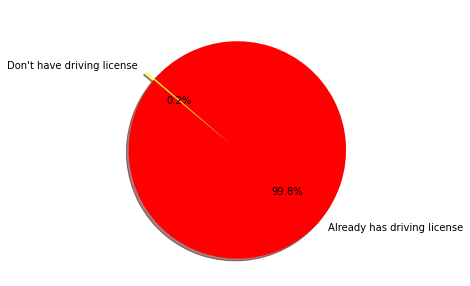

In [21]:
labels = "Already has driving license", "Don't have driving license"
sizes = [380297, 812]
colors = ['red', 'yellow']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Health insurance owner in this data mostly(99%) they have driving license

In [22]:
df['Region_Code'].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

In [23]:
df['Region_Code'].value_counts().head(5)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Region_Code, dtype: int64

In [24]:
df['Region_Code'].value_counts(normalize=True).head(5)

28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
Name: Region_Code, dtype: float64

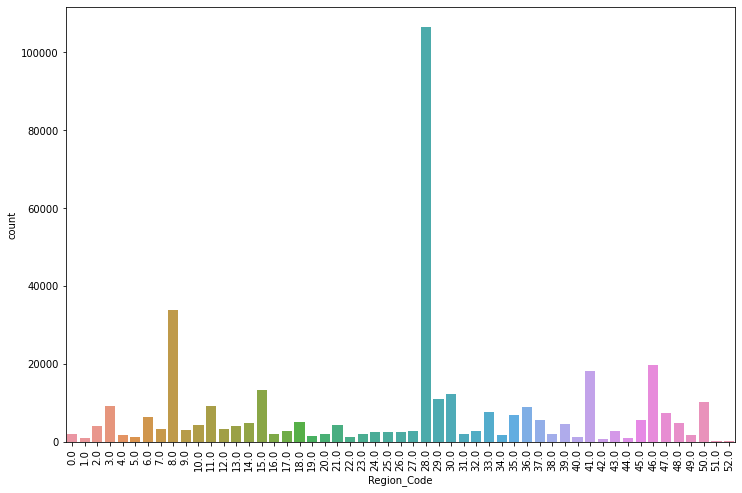

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'])
plt.xticks(rotation=90)
plt.show()

- Mostly(27%) from health insurance owner live in Region_Code 28

In [26]:
df['Previously_Insured'].describe()

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64

In [27]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

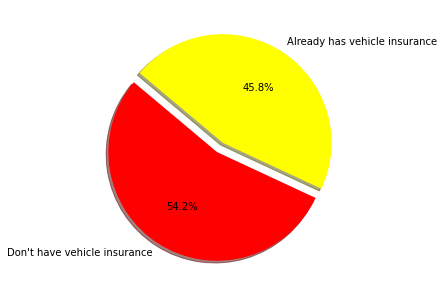

In [28]:
labels = "Don't have vehicle insurance", "Already has vehicle insurance"
sizes = [206481, 174628]
colors = ['red', 'yellow']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- 54.2% from health insurance owner didn't have vehicle insurance

In [29]:
df['Vehicle_Age'].describe()

count       381109
unique           3
top       1-2 Year
freq        200316
Name: Vehicle_Age, dtype: object

In [30]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

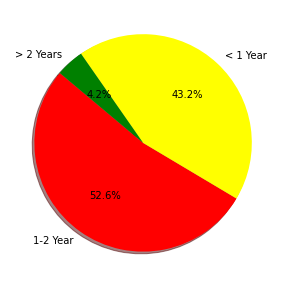

In [31]:
labels = "1-2 Year", "< 1 Year", "> 2 Years"
sizes = [200316, 164786, 16007]
colors = ['red', 'yellow', 'green']
explode = (0, 0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- 52.6% health insurance owner's car 1-2 years old

In [32]:
df['Vehicle_Damage'].describe()

count     381109
unique         2
top          Yes
freq      192413
Name: Vehicle_Damage, dtype: object

In [33]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

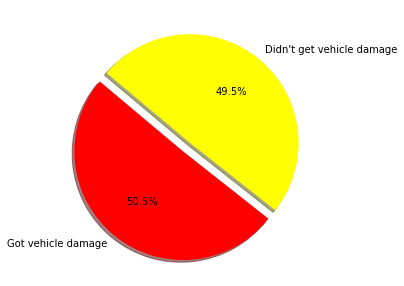

In [34]:
labels = "Got vehicle damage", "Didn't get vehicle damage"
sizes = [192413, 188696]
colors = ['red', 'yellow']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Number of health insurance owner who got vehicle damage and didn't are almost balance

In [35]:
df['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [36]:
df['Policy_Sales_Channel'].value_counts().head(5)

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
Name: Policy_Sales_Channel, dtype: int64

In [37]:
df['Policy_Sales_Channel'].value_counts(normalize=True).head(5)

152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
Name: Policy_Sales_Channel, dtype: float64

- 35% vehicle insurance offering through channel 152
- Policy_Sales_Channel is anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. So we don't know where the code for Agents, Mails, Phone, etc

In [38]:
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [39]:
df['Vintage'].value_counts().head(5)

256    1418
73     1410
282    1397
158    1394
187    1392
Name: Vintage, dtype: int64

- Vintage is number of Days, customer has been associated with the company. It can be said that vintage is the number of days someone becomes a health insurance owner
- Actually we can re-categorize this features based on number of days in a year. But we will see the correlation at feature selection

In [40]:
df['Response'].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

In [41]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

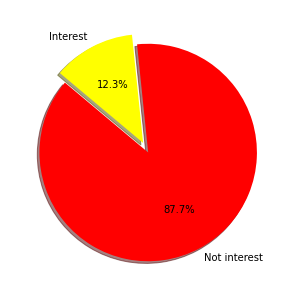

In [42]:
labels = "Not interest", "Interest"
sizes = [334399, 46710]
colors = ['red', 'yellow']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- 87.7% health insurance owner in this data are not interest with vehicle insurance offering
- Related to machine learning, this feature will be the target prediction and we can see the targets are imbalance

### Bivariate

#### Gender X Age X Annual_Premium

- We will binning age feature, to easier us to make plot
- Binning feature Age based on WHO age classificaiton: https://www.sehatq.com/artikel/risiko-penyakit-berdasarkan-klasifikasi-umur-menurut-who
- Dewasa/Adults (0): 20 - 60 tahun
- Lanjut usia/Elderly (1): > 60 tahun

In [43]:
df['Age_bins'] = pd.cut(df['Age'], bins=[19,60,85], labels=[0,1])

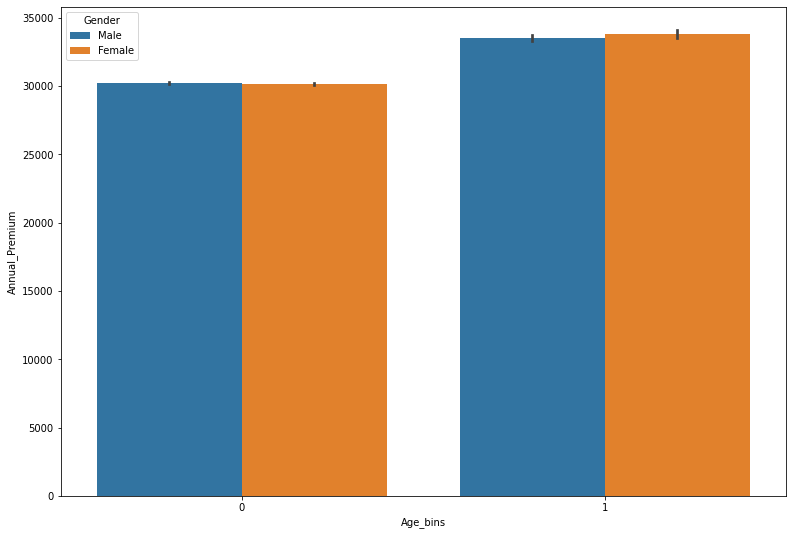

In [44]:
plt.figure(figsize=(13,9))
sns.barplot(x="Age_bins", y="Annual_Premium", hue="Gender", data=df)
plt.show()

In [45]:
print('Median of annual premium: ', df['Annual_Premium'].describe()['50%'])

Median of annual premium:  31669.0


In [46]:
pd.crosstab(index=[df['Age_bins']], columns='Median_Premium', values=df['Annual_Premium'], aggfunc='median')

col_0,Median_Premium
Age_bins,
0,31337.0
1,34904.0


- The elderly has a higher annual premium than adult (plot)
- Female in elderly has a higher annual premium than male in elderly (plot)
- Otherwise male in adult has a higher annual premium than female in adult (plot)
- The elderly has a higher annual premium than the median (crosstab)

#### Gender X Age X Previously_Insured

<Figure size 1080x1080 with 0 Axes>

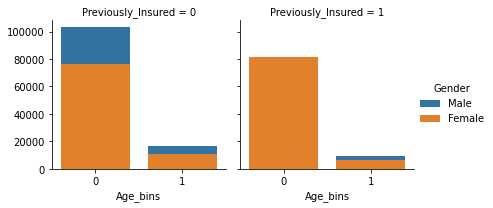

In [47]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='Previously_Insured', hue='Gender')
F.map(sns.countplot, 'Age_bins').add_legend()
plt.show()

- Previously_Insured = 0 :
    - Adult and elderly male mostly doesn't have vehicle insurance, more than female
- Previously_Insured = 1 :
    - Adult female mostly have vehicle insurance, more than male
    - elderly male mostly have vehicle insurance, more than female

#### Gender X Age X Vehicle_Damage

<Figure size 1080x1080 with 0 Axes>

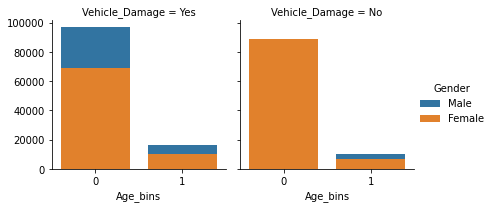

In [48]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='Vehicle_Damage', hue='Gender')
F.map(sns.countplot, 'Age_bins').add_legend()
plt.show()

- Vehicle_Damage = Yes :
    - Adult and elderly male mostly have got damage on their vehicle
- Vehicle_Damage = No :
    - Adult female and elderly male mostly haven't got damage on their vehicle

#### Gender X Age X Vehicle_Age

<Figure size 1080x1080 with 0 Axes>

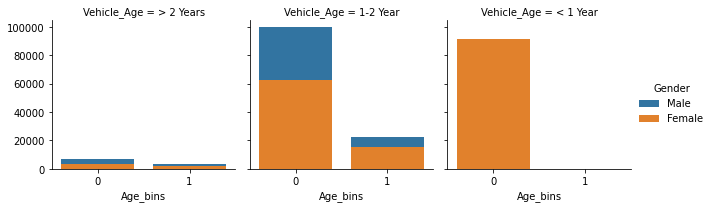

In [49]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='Vehicle_Age', hue='Gender')
F.map(sns.countplot, 'Age_bins').add_legend()
plt.show()

- Vehicle_Age = > 2 Years :
    - Adult and elderly male mostly have vehicle > 2 years old, more than female
- Vehicle_Age = 1-2 Year :
    - Adult and elderly male mostly have vehicle 1-2 years old, more than female
- Vehicle_Age = < 1 Year :
    - Adult female mostly have vehicle < 1 year old
    - No one elderly who have vehicle < 1 year old

#### Gender X Age X Previously_Insured X Response

<Figure size 1080x1080 with 0 Axes>

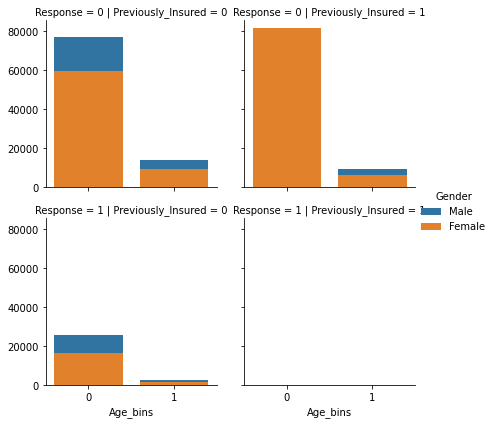

In [50]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='Previously_Insured', row='Response', hue='Gender')
F.map(sns.countplot, 'Age_bins').add_legend()
plt.show()

- Response = 1 (interest) | Previously_Insured = 1 :
    - No ones interested with vehicle insurance when they already have it
- Response = 1 (interest) | Previously_Insured = 0 :
    - Adult more than elderly
    - Adult male more than adult female
    - Elderly male more than elderly female
    - But overall are less than Response = 0 (who are not interest with vehicle insurance)


- RECOMMENDATION:
    - We can more offer vehicle insurance to health insurance owner who doesn't have vehicle insurance before. Because no ones interested with vehicle insurance when they already have it
    - We can more offer vehicle insurance to adult. Because adult more interested than elderly
    - We can more offer vehicle insurance to adult male. Because they are more interested than adult female

#### Gender X Annual_Premium X Vehicle_Age X Response

In [51]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

- We will re-categorize annual premium
- we split to 2 category:
    - <= 31669
    - >31669

In [52]:
df['Premium_bins'] = pd.cut(df['Annual_Premium'], bins=[0,31669,550000000], labels=['<=31669','>31669'])

In [53]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bins,Premium_bins
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,>31669
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,>31669
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,>31669
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,<=31669
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,<=31669


<Figure size 1080x1080 with 0 Axes>

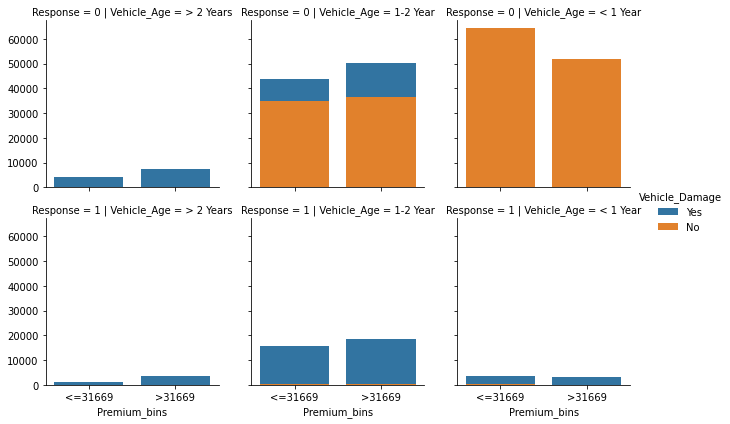

In [54]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='Vehicle_Age', row='Response', hue='Vehicle_Damage')
F.map(sns.countplot, 'Premium_bins').add_legend()
plt.show()

- Response = 1 (Interest) :
    - Who interested with vehicle insurance mostly who have vehicle 1-2 years old
    - Who interested with vehicle insurance mostly who have got vehicle damage
    - Who interested with vehicle insurance mostly who have annual premium above median

- RECOMMENDATION:
    - We can more offer vehicle insurance to they who have vehicle 1-2 years old
    - We can more offer vehicle insurance to they who have annual premium above median
    - We can more offer vehicle insurance to they have got vehicle damage

## Conclusion

- No ones interested with vehicle insurance when they already have it
- Adult more interested than elderly
- Adult male more interested than adult female
- Elderly male more interested than elderly female
- Who interested with vehicle insurance mostly who have vehicle 1-2 years old
- Who interested with vehicle insurance mostly who have got vehicle damage
- Who interested with vehicle insurance mostly who have annual premium above median

## Recommendation

- We can more offer vehicle insurance to health insurance owner who doesn't have vehicle insurance before. Because no ones interested with vehicle insurance when they already have it
- We can more offer vehicle insurance to adult. Because adult more interested than elderly
- We can more offer vehicle insurance to adult male. Because they are more interested than adult female
- We can more offer vehicle insurance to they who have vehicle 1-2 years old
- We can more offer vehicle insurance to they who have annual premium above median
- We can more offer vehicle insurance to they have got vehicle damage

## Data Preparation

In [55]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bins,Premium_bins
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,>31669
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,>31669
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,>31669
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,<=31669
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,<=31669


### Encoding

- We will encode Gender, Vehicle_Age, Vehicle_Damage features, Premium_bins

In [56]:
df['Gender_En'] = df['Gender'].map({'Female':0, 'Male':1})
df['Vehicle_Age_En'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
df['Vehicle_Damage_En'] = df['Vehicle_Damage'].map({'No':0, 'Yes':1})
df['Premium_En'] = df['Premium_bins'].map({'<=31669':0, '>31669':1})

In [57]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bins,Premium_bins,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Premium_En
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,>31669,1,2,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,>31669,1,1,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,>31669,1,2,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,<=31669,1,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,<=31669,0,0,0,0


In [58]:
df.drop(columns=['id','Gender','Age','Vehicle_Age','Vehicle_Damage','Premium_bins'], inplace=True)

### Feature Selection

In [59]:
df.head()

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bins,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Premium_En
0,1,28.0,0,40454.0,26.0,217,1,0,1,2,1,1
1,1,3.0,0,33536.0,26.0,183,0,1,1,1,0,1
2,1,28.0,0,38294.0,26.0,27,1,0,1,2,1,1
3,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,0
4,1,41.0,1,27496.0,152.0,39,0,0,0,0,0,0


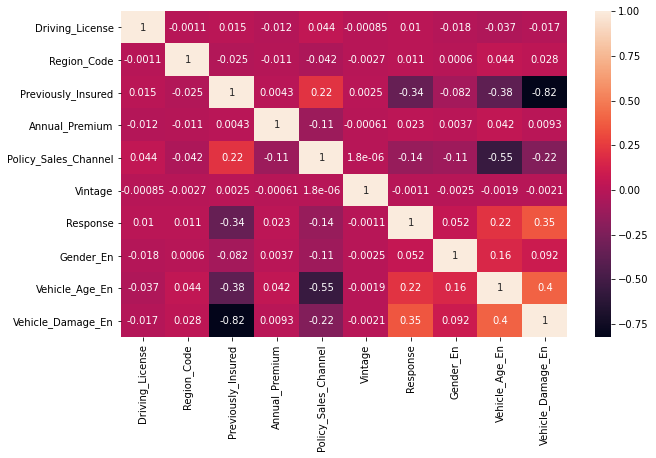

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

- We will not use 'Vintage' feature because after see the correlation heatmap. 'Vintage' has a very very weak correlation with 'Response' feature

In [61]:
def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [62]:
# correlation_ratio(df['Age_bins'], df['Response'])
correlation_ratio(df['Premium_En'], df['Response'])

0.03441818747894752

In [63]:
df_select = df.drop(columns=['Vintage','Annual_Premium'])
df_select.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response,Age_bins,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Premium_En
0,1,28.0,0,26.0,1,0,1,2,1,1
1,1,3.0,0,26.0,0,1,1,1,0,1
2,1,28.0,0,26.0,1,0,1,2,1,1
3,1,11.0,1,152.0,0,0,1,0,0,0
4,1,41.0,1,152.0,0,0,0,0,0,0


## Machine Learning Modelling

### Splitting Data

In [64]:
X = df_select.drop(columns='Response')
y = df_select['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, stratify=y, random_state=42)

In [65]:
X_train.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Age_bins,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Premium_En
274710,1,40.0,0,152.0,0,1,0,1,0
216539,1,8.0,1,26.0,0,0,0,0,1
78983,1,28.0,0,122.0,0,0,0,1,1
218368,1,37.0,0,152.0,0,1,0,1,1
307215,1,28.0,0,156.0,0,0,0,1,1


### Base Model

#### Logistic Regression

In [66]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

#### KNN Classifier

In [68]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
y_pred_KNN = model_KNN.predict(X_test)
y_pred_train_KNN = model_KNN.predict(X_train)

#### Random Forest

In [70]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred_RF = model_RF.predict(X_test)
y_pred_train_RF = model_RF.predict(X_train)

### Evaluation Matrix Base Model
- The focus is to avoid False Negative errors ==> Actual is Interested, but the prediction is Not-Interested. We want the prediction is interested and actual is interested
- We are not follow accuracy score because the target are imbalance. So we will follow recall in minority class

#### Logistic Regression (Base) Eval-Matrix

In [72]:
print(classification_report(y_test, y_pred_LR))  ## test data

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.12      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.50      0.50      0.47     76222
weighted avg       0.78      0.88      0.82     76222



- We can't use accuracy because it will be bias
- So we will use recall-precision, but their score is low, < 0.5

In [73]:
cm_LR = confusion_matrix(y_test, y_pred_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,4,9338
Akt 0,29,66851


In [74]:
print(classification_report(y_train, y_pred_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267519
           1       0.14      0.00      0.00     37368

    accuracy                           0.88    304887
   macro avg       0.51      0.50      0.47    304887
weighted avg       0.79      0.88      0.82    304887



In [75]:
cm_LR = confusion_matrix(y_train, y_pred_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,21,37347
Akt 0,129,267390


#### KNN Classifier (Base) Eval-Matrix

In [76]:
print(classification_report(y_test, y_pred_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66880
           1       0.33      0.17      0.23      9342

    accuracy                           0.86     76222
   macro avg       0.61      0.56      0.57     76222
weighted avg       0.82      0.86      0.84     76222



In [77]:
cm_LR = confusion_matrix(y_test, y_pred_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,1611,7731
Akt 0,3247,63633


In [78]:
print(classification_report(y_train, y_pred_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92    267519
           1       0.37      0.20      0.26     37368

    accuracy                           0.86    304887
   macro avg       0.63      0.57      0.59    304887
weighted avg       0.83      0.86      0.84    304887



In [79]:
cm_LR = confusion_matrix(y_train, y_pred_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,7307,30061
Akt 0,12369,255150


#### Random Forest (Base) Eval-Matrix

In [80]:
print(classification_report(y_test, y_pred_RF))  ## test data

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66880
           1       0.34      0.03      0.05      9342

    accuracy                           0.87     76222
   macro avg       0.61      0.51      0.49     76222
weighted avg       0.81      0.87      0.82     76222



In [81]:
cm_LR = confusion_matrix(y_test, y_pred_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,273,9069
Akt 0,541,66339


In [82]:
print(classification_report(y_train, y_pred_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267519
           1       0.71      0.06      0.12     37368

    accuracy                           0.88    304887
   macro avg       0.80      0.53      0.53    304887
weighted avg       0.86      0.88      0.84    304887



In [83]:
cm_LR = confusion_matrix(y_train, y_pred_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,2399,34969
Akt 0,964,266555


#### Evaluation Matrix Base Model (All)

In [84]:
prec_train_LR = precision_score(y_train, y_pred_train_LR)
prec_train_KNN = precision_score(y_train, y_pred_train_KNN)
prec_train_RF = precision_score(y_train, y_pred_train_RF)

prec_test_LR = precision_score(y_test, y_pred_LR)
prec_test_KNN = precision_score(y_test, y_pred_KNN)
prec_test_RF = precision_score(y_test, y_pred_RF)

rec_train_LR = recall_score(y_train, y_pred_train_LR)
rec_train_KNN = recall_score(y_train, y_pred_train_KNN)
rec_train_RF = recall_score(y_train, y_pred_train_RF)

rec_test_LR = recall_score(y_test, y_pred_LR)
rec_test_KNN = recall_score(y_test, y_pred_KNN)
rec_test_RF = recall_score(y_test, y_pred_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF]
}

mod_base = pd.DataFrame(data=EM, index=['LogReg','KNN_Clas','RF_Clas']).round(2)
mod_base

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg,0.14,0.12,0.00,0.00
KNN_Clas,0.37,0.33,0.20,0.17
RF_Clas,0.71,0.34,0.06,0.03


- The evaluation matrix's score is so bad. So far away from best score

### Data Improvement
- As we know the target are imbalance so we will try do data improvement with Random Over Sampling and Random Under Sampling

In [85]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Age_bins,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Premium_En,Response
274710,1,40.0,0,152.0,0,1,0,1,0,0
216539,1,8.0,1,26.0,0,0,0,0,1,0
78983,1,28.0,0,122.0,0,0,0,1,1,1
218368,1,37.0,0,152.0,0,1,0,1,1,0
307215,1,28.0,0,156.0,0,0,0,1,1,0


In [86]:
df_train['Response'].value_counts()

0    267519
1     37368
Name: Response, dtype: int64

In [87]:
not_interest = df_train[df_train['Response'] == 0] ## Kelas Majority
interest = df_train[df_train['Response'] == 1] ## Kelas Minority

#### Random Over Sampling

In [88]:
from sklearn.utils import resample

In [89]:
interest_oversample = resample(interest, ## Kelas Minority
                           replace=True,
                           n_samples = len(not_interest), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [90]:
df_OverSampled = pd.concat([not_interest, interest_oversample])

In [91]:
df_OverSampled['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [92]:
X_train_OverSample = df_OverSampled.drop(columns='Response')
y_train_OverSample = df_OverSampled['Response']

#### LogReg Model Base + Random Over Sampling

In [93]:
os_LR = LogisticRegression()
os_LR.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_os_LR = os_LR.predict(X_test)
y_os_train_LR = os_LR.predict(X_train_OverSample)

In [95]:
print(classification_report(y_train_OverSample, y_os_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267519
           1       0.70      0.98      0.82    267519

    accuracy                           0.78    535038
   macro avg       0.83      0.78      0.78    535038
weighted avg       0.83      0.78      0.78    535038



In [96]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,261245,6274
Akt 0,109542,157977


In [97]:
print(classification_report(y_test, y_os_LR))  ## test data

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [98]:
cm_LR = confusion_matrix(y_test, y_os_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,9130,212
Akt 0,27296,39584


#### KNN Model Base + Random Over Sampling

In [99]:
os_KNN = KNeighborsClassifier()
os_KNN.fit(X_train_OverSample, y_train_OverSample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
y_os_KNN = os_KNN.predict(X_test)
y_os_train_KNN = os_KNN.predict(X_train_OverSample)

In [101]:
print(classification_report(y_train_OverSample, y_os_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.67      0.79      0.72    267519
           1       0.74      0.61      0.67    267519

    accuracy                           0.70    535038
   macro avg       0.71      0.70      0.70    535038
weighted avg       0.71      0.70      0.70    535038



In [102]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,162800,104719
Akt 0,56631,210888


In [103]:
print(classification_report(y_test, y_os_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66880
           1       0.26      0.56      0.36      9342

    accuracy                           0.75     76222
   macro avg       0.60      0.67      0.60     76222
weighted avg       0.85      0.75      0.79     76222



In [104]:
cm_LR = confusion_matrix(y_test, y_os_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,5255,4087
Akt 0,14690,52190


#### Random Forest Model Base + Random Over Sampling

In [105]:
os_RF = RandomForestClassifier()
os_RF.fit(X_train_OverSample, y_train_OverSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
y_os_RF = os_RF.predict(X_test)
y_os_train_RF = os_RF.predict(X_train_OverSample)

In [107]:
print(classification_report(y_train_OverSample, y_os_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.93      0.69      0.79    267519
           1       0.76      0.94      0.84    267519

    accuracy                           0.82    535038
   macro avg       0.84      0.82      0.82    535038
weighted avg       0.84      0.82      0.82    535038



In [108]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,252749,14770
Akt 0,81856,185663


In [109]:
print(classification_report(y_test, y_os_RF))  ## test data

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66880
           1       0.28      0.88      0.43      9342

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.62     76222
weighted avg       0.89      0.71      0.76     76222



In [110]:
cm_LR = confusion_matrix(y_test, y_os_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,8209,1133
Akt 0,20709,46171


In [111]:
prec_train_LR = precision_score(y_train_OverSample, y_os_train_LR)
prec_train_KNN = precision_score(y_train_OverSample, y_os_train_KNN)
prec_train_RF = precision_score(y_train_OverSample, y_os_train_RF)

prec_test_LR = precision_score(y_test, y_os_LR)
prec_test_KNN = precision_score(y_test, y_os_KNN)
prec_test_RF = precision_score(y_test, y_os_RF)

rec_train_LR = recall_score(y_train_OverSample, y_os_train_LR)
rec_train_KNN = recall_score(y_train_OverSample, y_os_train_KNN)
rec_train_RF = recall_score(y_train_OverSample, y_os_train_RF)

rec_test_LR = recall_score(y_test, y_os_LR)
rec_test_KNN = recall_score(y_test, y_os_KNN)
rec_test_RF = recall_score(y_test, y_os_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF]
}

EM_OS = pd.DataFrame(data=EM, index=['LogReg_OS','KNN_Clas_OS','RF_Clas_OS']).round(2)

#### Random Under Sampling

In [112]:
not_interest_oversample = resample(not_interest, ## Kelas Minority
                           replace=True,
                           n_samples = len(interest), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [113]:
df_UnderSampled = pd.concat([interest, not_interest_oversample])

In [114]:
df_UnderSampled['Response'].value_counts()

1    37368
0    37368
Name: Response, dtype: int64

In [115]:
X_train_UnderSample = df_UnderSampled.drop(columns='Response')
y_train_UnderSample = df_UnderSampled['Response']

#### LogReg Model Base + Random Under Sampling

In [116]:
us_LR = LogisticRegression()
us_LR.fit(X_train_UnderSample, y_train_UnderSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_us_LR = us_LR.predict(X_test)
y_us_train_LR = os_LR.predict(X_train_UnderSample)

In [118]:
print(classification_report(y_train_UnderSample, y_us_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     37368
           1       0.71      0.98      0.82     37368

    accuracy                           0.78     74736
   macro avg       0.83      0.78      0.78     74736
weighted avg       0.83      0.78      0.78     74736



In [119]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,36505,863
Akt 0,15266,22102


In [120]:
print(classification_report(y_test, y_us_LR))  ## test data

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [121]:
cm_LR = confusion_matrix(y_test, y_us_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,9130,212
Akt 0,27296,39584


#### KNN Model Base + Random Under Sampling

In [122]:
us_KNN = KNeighborsClassifier()
us_KNN.fit(X_train_UnderSample, y_train_UnderSample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [123]:
y_us_KNN = us_KNN.predict(X_test)
y_us_train_KNN = os_KNN.predict(X_train_UnderSample)

In [124]:
print(classification_report(y_train_UnderSample, y_us_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.67      0.79      0.72     37368
           1       0.74      0.60      0.67     37368

    accuracy                           0.70     74736
   macro avg       0.70      0.70      0.69     74736
weighted avg       0.70      0.70      0.69     74736



In [125]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,22591,14777
Akt 0,7868,29500


In [126]:
print(classification_report(y_test, y_us_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     66880
           1       0.26      0.91      0.41      9342

    accuracy                           0.68     76222
   macro avg       0.62      0.78      0.59     76222
weighted avg       0.89      0.68      0.73     76222



In [127]:
cm_LR = confusion_matrix(y_test, y_us_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,8456,886
Akt 0,23531,43349


#### Random Forest Model Base + Random Under Sampling

In [129]:
us_RF = RandomForestClassifier()
us_RF.fit(X_train_UnderSample, y_train_UnderSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
y_us_RF = us_RF.predict(X_test)
y_us_train_RF = os_RF.predict(X_train_UnderSample)

In [131]:
print(classification_report(y_train_UnderSample, y_us_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.92      0.70      0.79     37368
           1       0.76      0.94      0.84     37368

    accuracy                           0.82     74736
   macro avg       0.84      0.82      0.82     74736
weighted avg       0.84      0.82      0.82     74736



In [132]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,35199,2169
Akt 0,11361,26007


In [133]:
print(classification_report(y_test, y_us_RF))  ## test data

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66880
           1       0.28      0.90      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.89      0.70      0.75     76222



In [134]:
cm_LR = confusion_matrix(y_test, y_us_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,8447,895
Akt 0,21661,45219


In [135]:
prec_train_LR = precision_score(y_train_UnderSample, y_us_train_LR)
prec_train_KNN = precision_score(y_train_UnderSample, y_us_train_KNN)
prec_train_RF = precision_score(y_train_UnderSample, y_us_train_RF)

prec_test_LR = precision_score(y_test, y_us_LR)
prec_test_KNN = precision_score(y_test, y_us_KNN)
prec_test_RF = precision_score(y_test, y_us_RF)

rec_train_LR = recall_score(y_train_UnderSample, y_us_train_LR)
rec_train_KNN = recall_score(y_train_UnderSample, y_us_train_KNN)
rec_train_RF = recall_score(y_train_UnderSample, y_us_train_RF)

rec_test_LR = recall_score(y_test, y_us_LR)
rec_test_KNN = recall_score(y_test, y_us_KNN)
rec_test_RF = recall_score(y_test, y_us_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF],
    
    
}

EM_US = pd.DataFrame(data=EM, index=['LogReg_US','KNN_Clas_US','RF_Clas_US']).round(2)
EM_US

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg_US,0.71,0.25,0.98,0.98
KNN_Clas_US,0.74,0.26,0.60,0.91
RF_Clas_US,0.76,0.28,0.94,0.90


In [136]:
EM_OS

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg_OS,0.70,0.25,0.98,0.98
KNN_Clas_OS,0.74,0.26,0.61,0.56
RF_Clas_OS,0.76,0.28,0.94,0.88


- The evaluation matrix's score are better now. Under sampling and over sampling give a big impact for increasing score
- But, under sampling's score are better than over sampling

### Model Improvement
- We will try to improve the model with Tuning / Hyper Parameter Tuning

#### Logistic Regression Tuned + Under Sampling

In [137]:
## LogReg kita cuma menambahkan parameter 'class_weight'
tune_LR = LogisticRegression(class_weight={0:.12, 1:.88})
tune_LR.fit(X_train_UnderSample, y_train_UnderSample)

LogisticRegression(C=1.0, class_weight={0: 0.12, 1: 0.88}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_tune_LR = tune_LR.predict(X_test)
y_tune_train_LR = tune_LR.predict(X_train_UnderSample)

In [139]:
print(classification_report(y_train_UnderSample, y_tune_train_LR))  ## Train data

              precision    recall  f1-score   support

           0       0.99      0.52      0.69     37368
           1       0.68      1.00      0.81     37368

    accuracy                           0.76     74736
   macro avg       0.84      0.76      0.75     74736
weighted avg       0.84      0.76      0.75     74736



In [140]:
cm = confusion_matrix(y_train_UnderSample, y_tune_train_LR, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,37249,119
Akt 0,17781,19587


In [141]:
print(classification_report(y_test, y_tune_LR))  ## Test Data

              precision    recall  f1-score   support

           0       1.00      0.52      0.69     66880
           1       0.23      1.00      0.37      9342

    accuracy                           0.58     76222
   macro avg       0.61      0.76      0.53     76222
weighted avg       0.90      0.58      0.65     76222



In [142]:
cm = confusion_matrix(y_test, y_tune_LR, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,9302,40
Akt 0,31946,34934


#### KNN Classifier Tuned + Under Sampling

In [143]:
tune_KNN = KNeighborsClassifier()

param_KNN = {"n_neighbors" : [5, 15, 25, 35, 65],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [144]:
model_KNN = GridSearchCV(estimator=tune_KNN, param_grid=param_KNN, n_jobs = -1, cv = 3, verbose=1, scoring='recall')

In [145]:
model_KNN.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 65], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [146]:
KNN_Tuned = model_KNN.best_estimator_
y_tuned_KNN = KNN_Tuned.predict(X_test)
y_tuned_train_KNN = KNN_Tuned.predict(X_train_UnderSample)

In [147]:
print(classification_report(y_train_UnderSample, y_tuned_train_KNN))  ## Train data

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     37368
           1       0.72      0.94      0.81     37368

    accuracy                           0.78     74736
   macro avg       0.81      0.78      0.78     74736
weighted avg       0.81      0.78      0.78     74736



In [148]:
cm = confusion_matrix(y_train_UnderSample, y_tuned_train_KNN, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,35098,2270
Akt 0,13847,23521


In [149]:
print(classification_report(y_test, y_tuned_KNN))  ## Test data

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     66880
           1       0.26      0.94      0.41      9342

    accuracy                           0.66     76222
   macro avg       0.62      0.78      0.59     76222
weighted avg       0.90      0.66      0.72     76222



In [150]:
cm = confusion_matrix(y_test, y_tuned_KNN, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,8753,589
Akt 0,25004,41876


#### Random Forest Class Tuned + Under Sampling

In [151]:
tune_RF = RandomForestClassifier()

param_RF ={"max_depth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

In [152]:
model_RF = GridSearchCV(estimator=tune_RF, param_grid=param_RF, cv = 2, n_jobs=-1, verbose=1)

In [153]:
model_RF.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [154]:
RF_tuned = model_RF.best_estimator_
y_tuned_RF = RF_tuned.predict(X_test)
y_tuned_train_RF = RF_tuned.predict(X_train_UnderSample)

In [155]:
print(classification_report(y_train_UnderSample, y_tuned_train_RF))  ## Train data

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     37368
           1       0.73      0.94      0.82     37368

    accuracy                           0.80     74736
   macro avg       0.83      0.80      0.80     74736
weighted avg       0.83      0.80      0.80     74736



In [156]:
print(classification_report(y_test, y_tuned_RF)) ## Test data

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66880
           1       0.27      0.94      0.43      9342

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



#### LogReg Tuned + Over Sampling

In [157]:
OS_tune_LR = LogisticRegression(class_weight={0:.12, 1:.88})
OS_tune_LR.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight={0: 0.12, 1: 0.88}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
y_tune_os_LR = OS_tune_LR.predict(X_test)
y_tune_os_train_LR = OS_tune_LR.predict(X_train_OverSample)

In [159]:
print(classification_report(y_train_OverSample, y_tune_os_train_LR)) ## Train data

              precision    recall  f1-score   support

           0       0.99      0.52      0.68    267519
           1       0.68      1.00      0.81    267519

    accuracy                           0.76    535038
   macro avg       0.83      0.76      0.75    535038
weighted avg       0.83      0.76      0.75    535038



In [160]:
cm = confusion_matrix(y_train_OverSample, y_tune_os_train_LR, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,266626,893
Akt 0,127814,139705


In [161]:
print(classification_report(y_test, y_tune_os_LR)) ## Test data

              precision    recall  f1-score   support

           0       1.00      0.52      0.69     66880
           1       0.23      1.00      0.37      9342

    accuracy                           0.58     76222
   macro avg       0.61      0.76      0.53     76222
weighted avg       0.90      0.58      0.65     76222



In [162]:
cm = confusion_matrix(y_test, y_tune_os_LR, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,9300,42
Akt 0,31929,34951


#### KNN Class Tuned + Over Sampling

In [163]:
OS_KNN_tune = KNeighborsClassifier()
param_KNN = {"n_neighbors" : [5, 15, 25, 35, 65],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [164]:
model_KNN = GridSearchCV(estimator=OS_KNN_tune, param_grid=param_KNN, n_jobs = -1, cv = 3, verbose=1, scoring='recall')

In [165]:
model_KNN.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 65], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [166]:
KNN_tuned_OS = model_KNN.best_estimator_
y_os_tuned_KNN = KNN_tuned_OS.predict(X_test)
y_os_tuned_train_KNN = KNN_tuned_OS.predict(X_train_OverSample)

In [167]:
print(classification_report(y_train_OverSample, y_os_tuned_train_KNN))  ## Train data

              precision    recall  f1-score   support

           0       0.91      0.62      0.74    267519
           1       0.71      0.94      0.81    267519

    accuracy                           0.78    535038
   macro avg       0.81      0.78      0.78    535038
weighted avg       0.81      0.78      0.78    535038



In [168]:
cm = confusion_matrix(y_train_OverSample, y_os_tuned_train_KNN, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,251207,16312
Akt 0,100578,166941


In [169]:
print(classification_report(y_test, y_os_tuned_KNN))  ## Test data

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     66880
           1       0.26      0.94      0.41      9342

    accuracy                           0.66     76222
   macro avg       0.62      0.78      0.59     76222
weighted avg       0.90      0.66      0.72     76222



In [170]:
cm = confusion_matrix(y_test, y_os_tuned_KNN, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,8753,589
Akt 0,25004,41876


#### Random Forest Class Tuned + Over Sampling

In [171]:
OS_tune_RF = RandomForestClassifier()

param_RF ={"max_depth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .7, .8]}

In [172]:
model_RF = GridSearchCV(estimator=OS_tune_RF, param_grid=param_RF, cv = 3, n_jobs=-1, verbose=1)

In [173]:
model_RF.fit(X_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 95.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [174]:
RF_tuned_OS = model_RF.best_estimator_
y_os_tuned_RF = RF_tuned_OS.predict(X_test)
y_os_tuned_train_RF = RF_tuned_OS.predict(X_train_OverSample)

In [175]:
print(classification_report(y_train_OverSample, y_os_tuned_train_RF))  ## Train data

              precision    recall  f1-score   support

           0       0.92      0.70      0.79    267519
           1       0.76      0.94      0.84    267519

    accuracy                           0.82    535038
   macro avg       0.84      0.82      0.82    535038
weighted avg       0.84      0.82      0.82    535038



In [176]:
cm = confusion_matrix(y_train_OverSample, y_os_tuned_train_RF, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,252172,15347
Akt 0,81285,186234


In [177]:
print(classification_report(y_test, y_os_tuned_RF))  ## Test data

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66880
           1       0.28      0.88      0.43      9342

    accuracy                           0.72     76222
   macro avg       0.63      0.78      0.62     76222
weighted avg       0.89      0.72      0.76     76222



In [178]:
cm = confusion_matrix(y_test, y_os_tuned_RF, labels=[1,0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,8177,1165
Akt 0,20552,46328


In [182]:
prec_train_LR = precision_score(y_train_OverSample, y_tune_os_train_LR)
prec_train_KNN = precision_score(y_train_OverSample, y_os_tuned_train_KNN)
prec_train_RF = precision_score(y_train_OverSample, y_os_tuned_train_RF)

prec_test_LR = precision_score(y_test, y_tune_os_LR)
prec_test_KNN = precision_score(y_test, y_os_tuned_KNN)
prec_test_RF = precision_score(y_test, y_os_tuned_RF)

rec_train_LR = recall_score(y_train_OverSample, y_tune_os_train_LR)
rec_train_KNN = recall_score(y_train_OverSample, y_os_tuned_train_KNN)
rec_train_RF = recall_score(y_train_OverSample, y_os_tuned_train_RF)

rec_test_LR = recall_score(y_test, y_tune_os_LR)
rec_test_KNN = recall_score(y_test, y_os_tuned_KNN)
rec_test_RF = recall_score(y_test, y_os_tuned_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF],
}

OS_tuned = pd.DataFrame(data=EM, index=['LogReg_OS_Tuned','KNN_OS_Tuned','RF_OS_Tuned']).round(2)

#### Evaluation Matrix Tuned + Sampling

In [179]:
prec_train_LR = precision_score(y_train_UnderSample, y_tune_train_LR)
prec_train_KNN = precision_score(y_train_UnderSample, y_tuned_train_KNN)
prec_train_RF = precision_score(y_train_UnderSample, y_tuned_train_RF)

prec_test_LR = precision_score(y_test, y_tune_LR)
prec_test_KNN = precision_score(y_test, y_tuned_KNN)
prec_test_RF = precision_score(y_test, y_tuned_RF)

rec_train_LR = recall_score(y_train_UnderSample, y_tune_train_LR)
rec_train_KNN = recall_score(y_train_UnderSample, y_tuned_train_KNN)
rec_train_RF = recall_score(y_train_UnderSample, y_tuned_train_RF)

rec_test_LR = recall_score(y_test, y_tune_LR)
rec_test_KNN = recall_score(y_test, y_tuned_KNN)
rec_test_RF = recall_score(y_test, y_tuned_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_RF],
}

US_tuned = pd.DataFrame(data=EM, index=['LogReg_US_Tuned','KNN_US_Tuned','RF_US_Tuned']).round(2)

In [183]:
pd.concat([mod_base, EM_OS, EM_US, US_tuned, OS_tuned])

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg,0.14,0.12,0.00,0.00
KNN_Clas,0.37,0.33,0.20,0.17
RF_Clas,0.71,0.34,0.06,0.03
LogReg_OS,0.70,0.25,0.98,0.98
KNN_Clas_OS,0.74,0.26,0.61,0.56
RF_Clas_OS,0.76,0.28,0.94,0.88
LogReg_US,0.71,0.25,0.98,0.98
KNN_Clas_US,0.74,0.26,0.60,0.91
RF_Clas_US,0.76,0.28,0.94,0.90
LogReg_US_Tuned,0.68,0.23,1.00,1.00


## Conclusion
- After we do hyper parameter tuning, evaluation matrix are increasing
- The best score is Logistic Regression US Tuned and Logistic Regression OS Tuned